In [1]:
import numpy as np
import scipy.stats as stat
import h5py
import corner
from multiprocessing import Pool
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import utilities
import os
import emcee
import seaborn as sns
import warnings
import time
import pickle
from model import *

warnings.filterwarnings("ignore")
os.environ["OMP_NUM_THREADS"] = "1"

sns.set_style('whitegrid')
sns.set_context("paper", rc={"font.size": 12, "axes.titlesize": 12, "axes.labelsize": 12})

In [2]:
with open('/Users/willroper/Documents/University/SimFarm2030/SimFarm2030/cultivar_models/Claire_Yield_model.pck', 'rb') as ClaireModel:
    claire = pickle.load(ClaireModel)

In [3]:
with open('/Users/willroper/Documents/University/SimFarm2030/SimFarm2030/cultivar_models/Cordiale_Yield_model.pck', 'rb') as CordialeModel:
    cordiale = pickle.load(CordialeModel)

In [4]:
with open('/Users/willroper/Documents/University/SimFarm2030/SimFarm2030/cultivar_models/Solstice_Yield_model.pck', 'rb') as SolsticeModel:
    solstice = pickle.load(SolsticeModel)

In [5]:
with open('/Users/willroper/Documents/University/SimFarm2030/SimFarm2030/cultivar_models/Skyfall_Yield_model.pck', 'rb') as SkyfallModel:
    skyfall = pickle.load(SkyfallModel)

In [11]:
allMuT = np.array([solstice.mean_params['mu_t'],claire.mean_params['mu_t'],cordiale.mean_params['mu_t'],skyfall.mean_params['mu_t']])
avgMuT = np.mean(allMuT)

solsticeMuT = np.median(solstice.mean_params['mu_t'])/avgMuT
claireMuT = np.median(claire.mean_params['mu_t'])/avgMuT
cordialeMuT = np.median(cordiale.mean_params['mu_t'])/avgMuT
skyfallMuT = np.median(skyfall.mean_params['mu_t'])/avgMuT

y = np.array([solsticeMuT,claireMuT,cordialeMuT,skyfallMuT])

In [12]:
allMuP = np.array([solstice.mean_params['mu_p'],claire.mean_params['mu_p'],cordiale.mean_params['mu_p'],skyfall.mean_params['mu_p']])
avgMuP = np.mean(allMuP)

solsticeMuP = np.median(solstice.mean_params['mu_p'])/avgMuP
claireMuP = np.median(claire.mean_params['mu_p'])/avgMuP
cordialeMuP = np.median(cordiale.mean_params['mu_p'])/avgMuP
skyfallMuP = np.median(skyfall.mean_params['mu_p'])/avgMuP

y = np.array([solsticeMuP,claireMuP,cordialeMuP,skyfallMuP])

In [14]:
allSigmaP = np.array([solstice.mean_params['sig_p'],claire.mean_params['sig_p'],cordiale.mean_params['sig_p'],skyfall.mean_params['sig_p']])
avgSigmaP = np.mean(allSigmaP)

solsticeSigmaP = np.median(solstice.mean_params['sig_p'])/avgSigmaP
claireSigmaP = np.median(claire.mean_params['sig_p'])/avgSigmaP
cordialeSigmaP = np.median(cordiale.mean_params['sig_p'])/avgSigmaP
skyfallSigmaP = np.median(skyfall.mean_params['sig_p'])/avgSigmaP

y = np.array([solsticeSigmaP,claireSigmaP,cordialeSigmaP,skyfallSigmaP])

In [15]:
allSigmaT = np.array([solstice.mean_params['sig_t'],claire.mean_params['sig_t'],cordiale.mean_params['sig_t'],skyfall.mean_params['sig_t']])
avgSigmaT = np.mean(allSigmaT)

solsticeSigmaT = np.median(solstice.mean_params['sig_t'])/avgSigmaT
claireSigmaT = np.median(claire.mean_params['sig_t'])/avgSigmaT
cordialeSigmaT = np.median(cordiale.mean_params['sig_t'])/avgSigmaT
skyfallSigmaT = np.median(skyfall.mean_params['sig_t'])/avgSigmaT

y = np.array([solsticeSigmaT,claireSigmaT,cordialeSigmaT,skyfallSigmaT])

In [16]:
allRho = np.array([solstice.mean_params['rho'],claire.mean_params['rho'],cordiale.mean_params['rho'],skyfall.mean_params['rho']])
avgRho = np.mean(allRho)

solsticeRho = np.median(solstice.mean_params['rho'])/avgRho
claireRho = np.median(claire.mean_params['rho'])/avgRho
cordialeRho = np.median(cordiale.mean_params['rho'])/avgRho
skyfallRho = np.median(skyfall.mean_params['rho'])/avgRho

y = np.array([solsticeRho,claireRho,cordialeRho,skyfallRho])

In [17]:
allNorm = np.array([solstice.mean_params['norm'],claire.mean_params['norm'],cordiale.mean_params['norm'],skyfall.mean_params['norm']])
avgNorm = np.mean(allNorm)

solsticeNorm = np.median(solstice.mean_params['norm'])/avgNorm
claireNorm = np.median(claire.mean_params['norm'])/avgNorm
cordialeNorm = np.median(cordiale.mean_params['norm'])/avgNorm
skyfallNorm = np.median(skyfall.mean_params['norm'])/avgNorm

y = np.array([solsticeNorm,claireNorm,cordialeNorm,skyfallNorm])

In [18]:
allSolstice = np.array([solsticeNorm,solsticeMuT,solsticeMuP,solsticeRho,solsticeSigmaT,solsticeSigmaP])
allCordiale = np.array([cordialeNorm,cordialeMuT,cordialeMuP,cordialeRho,cordialeSigmaT,cordialeSigmaP])
allClaire = np.array([claireNorm,claireMuT,cordialeMuP,claireRho,claireSigmaT,claireSigmaP])
allSkyfall = np.array([skyfallNorm,skyfallMuT,skyfallMuP,skyfallRho,skyfallSigmaT,skyfallSigmaP])

In [20]:
pltMu_t = np.array([solsticeMuT,claireMuT,cordialeMuT,skyfallMuT])
pltMu_p = np.array([solsticeMuP,claireMuP,cordialeMuP,skyfallMuP])
pltSigma_t = np.array([solsticeSigmaT,claireSigmaT,cordialeSigmaT,skyfallSigmaT])
pltSigma_p = np.array([solsticeSigmaP,claireSigmaP,cordialeSigmaP,skyfallSigmaP])
pltRho = np.array([solsticeRho,claireRho,cordialeRho,skyfallRho])
pltNorm = np.array([solsticeNorm,claireNorm,cordialeNorm,skyfallNorm])

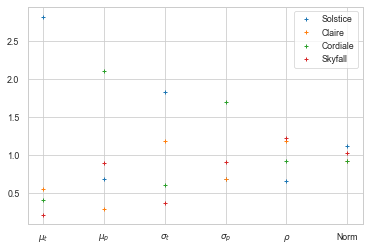

In [23]:
y = np.array([pltMu_t,pltMu_p,pltSigma_t,pltSigma_p,pltRho,pltNorm])
plt.xticks([0,1,2,3,4,5,6],['$\mu_t$','$\mu_p$','$\sigma_t$','$\sigma_p$',r'$\rho$','Norm'])
plt.plot(y,'+')
plt.legend(['Solstice','Claire','Cordiale','Skyfall'])
plt.show()